# Machine Learning - Ex 2
---

First, we load libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as op

## Problem 1: Logistic Regression

Loading data and X and y variables

In [25]:
data1 = np.loadtxt("./data/ex2data1.txt", delimiter=',')
X = data1[:,[0,1]]
y = data1[:,2]

### Problem 1.1: Visualizing the Data

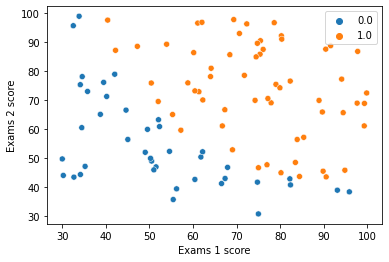

In [26]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)
# plt.scatter(x=X[:,0],y=X[:,1], c=y)
plt.ylabel("Exams 2 score")
plt.xlabel('Exams 1 score')
plt.show()
#need to learn how to change labels in seaborn.

### Problem 1.2: Implementation

First, we need to define the sigmoind fuction using the new eq $h_{\theta}(x) = g(\theta^T x)$ where the sigmoind functoin is
$g(z) = \frac{1}{1 + e^{-z}}$

In [27]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

Now we can use g(z) to compute the cost function and gradient descent

We can set dimensions n and m

In [28]:
m = len(X)
n = np.ndim(X)

cost function: $$J(ø) = -\frac{1}{m}[∑y^ilog(h_ø(x^i))+(1-y^i)log(1-h_ø(x^i))]$$
and gradient cost $$\frac{\partial J(\theta)}{\partial \theta_j} =
    \frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [29]:
def cost(theta, X, y):
    h = sigmoid(np.dot(X,theta))
    J = (np.dot(y,np.log(h))+np.dot((1-y),np.log(1-h)))/-len(X)
    return J

def gradient(theta, X, y):
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,(h-y))/len(X)
    return grad

Set theta and X_train so we can then calculate $J(\theta)$

In [30]:
theta = np.zeros(np.ndim(X)+1)
X_train = np.column_stack((np.ones(m),X))

Now, that our cost function is working effectively, we can use scipy optimize to find out optimal learning parameters (theta_opt and J)

In [31]:
res = op.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac = gradient)

#rex.x will be our theta_opt

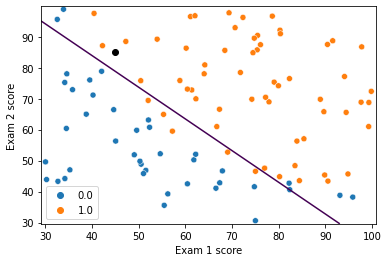

In [32]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
#     plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
#     plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    sns.scatterplot(x=X[:,0],y=X[:,1], hue= y)
    plt.scatter(x=45,y=85, color='black')
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()
    
plotDecisionBoundary(res.x, X, y)

Now we can evaluate it and actually predict if someone passes or not based on their Exam# score

In [33]:
X_pred = [1,45,85]

In [34]:
def predict(theta, X):
    h = sigmoid(np.dot(X,theta))
    return h
print("Percentage of admittion(1) for test data =",predict(res.x, X_pred)*100, "%") ##I aded it to the plot above

Percentage of admittion(1) for test data = 77.62208905362719 %


Finally, we know the percentage our test got with the training data but don't the accuracy of the training set optimization

In [35]:
predict_perc = np.mean(np.round(predict(res.x, X_train))==y)
print("Percentage of admittion(1) for training set =",predict_perc*100, "%")

Percentage of admittion(1) for training set = 89.0 %


## Problem 2: Regularized Logistic Regression

Loading data and X and y variables

In [36]:
data2 = np.loadtxt("./data/ex2data2.txt", delimiter=',')
X = data2[:,[0,1]]
y = data2[:,2]

### Problem 2.1: Visualizing the Data

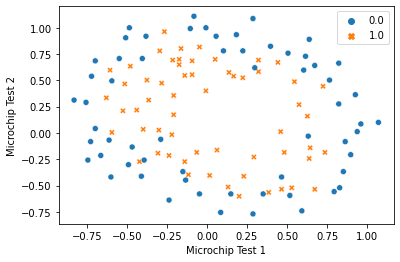

In [37]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y, style=y)
# plt.scatter(x=X[:,0],y=X[:,1], c=y)
plt.ylabel("Microchip Test 2")
plt.xlabel('Microchip Test 1')
plt.show()

### Problem 2.2: Feature Mapping

We must define a function what will map polynomial features given the features we have

In [51]:
def mapFeature(X1,X2):
    deg = 6 #set the max degrees for our polynomial feature
    x_poly = np.ones(len(X1)).reshape(len(X1),1) #create empty output variable with xn=1
    for i in range(1,deg+1):
        for j in range(i+1):
            x_poly = np.hstack((x_poly,(X1**(i-j)*X2**(j))[:, np.newaxis]))
    return x_poly
X_train = (mapFeature(X[:,0],X[:,1]))

In [52]:
# np.ones((X[:,0].shape[0], 1))
# np.ones(len(X[:,0])).reshape(len(X[:,0]),1)

### Problem 2.3: Cost Function and Gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression

cost function -->$$J(\theta) = \frac{1}{m}[\sum_{i=1}^m
    {-y^{(i)} \log{h_{\theta}}(x^{(i)}) - (1 - y^{(i)}) \log{(1 - h_{\theta}}(x^{(i)}))}] +
    \frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2}$$

gradients --> $$\frac{\partial J(\theta)}{\partial \theta_j} =
    \frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j} \quad (j = 0)$$
$$\frac{\partial J(\theta)}{\partial \theta_j} =
    (\frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j}) +
    \frac{\lambda}{m}\theta_j \quad (j \neq 0)$$

First, we set variables to such as dimensions m and n and initialize theta and set lamba to 1

In [53]:
m = len(X_train)
n = np.shape(X_train)[1]-1
theta = np.zeros(n+1)
lam = 1

Now, we can compute cost function and return $J(ø)$ and gradient to input into scipy optimization algo

In [54]:
def cost(theta, X, y, lam):
    h = sigmoid(np.dot(X,theta))
    J = ((np.dot(y,np.log(h))+np.dot((1-y),np.log(1-h)))/-len(X))+((np.dot(theta,theta))*lam/(2*len(X)))
    return J

def gradient(theta, X, y,lam):
    h = sigmoid(np.dot(X,theta))
    grad = (np.dot(X.T,(h-y))/len(X))+((theta*lam)/len(X))
    return grad

Now, that our cost function is working effectively, we can use scipy optimize to find out optimal learning parameters (theta_opt and J)

In [55]:
res = op.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac = gradient)

### Problem 2.4: Plot decision boundary

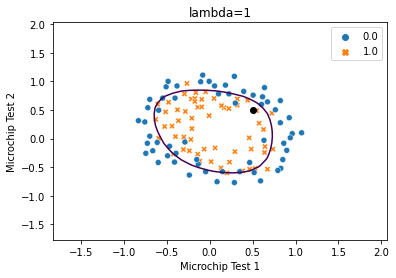

In [56]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = mapFeature(X_plot[:,0], X_plot[:,1])
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
#     plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
#     plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    sns.scatterplot(x=X[:,0],y=X[:,1], hue=y, style=y)
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.scatter(x=0.5,y=0.5, color='black')
    plt.ylabel("Microchip Test 2")
    plt.xlabel('Microchip Test 1')
    plt.title('lambda=1')
    plt.legend()
    plt.show()
    
plotDecisionBoundary(res.x, X, y)

Now, we can use this model to predict

Lets say we wan to predict test 1 = 0.5 and test 2 = 0.5

In [75]:
X_pred = np.array(([0.5,0.5]))
X_pred_test = mapFeature(X_pred[:1],X_pred[1:2])

In [76]:
def predict(theta, X):
    h = sigmoid(np.dot(X,theta))
    return h

print("Percentage of success(1) for test data =",predict(res.x, X_pred_test)*100, "%")

Percentage of success(1) for test data = [64.74515455] %


Finally, we know the percentage our test got with the training data but don't the accuracy of the training set optimization with lambda = 1

In [77]:
predict_perc = np.mean(np.round(predict(res.x, X_train))==y)
print("Percentage of success(1) for training set =",predict_perc*100, "%")

Percentage of success(1) for training set = 82.20338983050848 %
